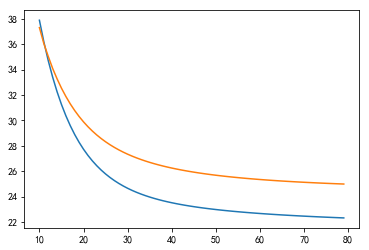

In [40]:
%matplotlib inline
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from numpy import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

mem = Memory("./mycache")      

def validation(X,y,w):
    l=y-X*w  
    L=np.array(l)
    sumV=0
    for i in range(102):
        sumV=sumV+L[i]**2
    sumV=sumV/102
    return sumV,L


@mem.cache
def get_data():
    data = load_svmlight_file("G:\\Users\\qqqqqq1997520\\Desktop\\housing.txt")
    return data[0], data[1]

X, y = get_data()
W=np.mat([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain=X_train.todense()
Xvali=X_vali.todense()
Xtrain=np.transpose(Xtrain)
Xtrain=Xtrain.T
Ytrain=np.mat(y_train).T
Yvali=np.mat(y_vali).T
X2train=np.column_stack((Xtrain,ones(404)))
X2vali=np.column_stack((Xvali,ones(102)))
sumT=0

#LT=[0,0,0,0,0,0,0,0]
#LV=[0,0,0,0,0,0,0,0]
LT=[0 for i in range(70)]
LV=[0 for i in range(70)]
k=0
for i in range(80):
    L=np.array((X2train*W-Ytrain))
    for j in range(404):
        sumT=sumT+L[j]**2
    sumT=sumT/404
    W=W-0.0004*(2*X2train.T*(X2train*W-Ytrain))
    #if((i+1)%10==0):
    if(i>=10):
        LT[k]=sumT
        LV[k],a=validation(X2vali,Yvali,W)
        k+=1

#print(sumT)
#sumV=0
#sumV,L=validation(X2vali,Yvali,W)
#print(sumV)

#x=[10,20,30,40,50,60,70,80]
x=[i for i in range(10,80)]
plt.figure(1)
plt.plot(x,LT)#蓝色线这是训练集Loss
plt.plot(x,LV)#橙色线这是验证集Loss